In [1]:
try:
    import davos
except:
    %pip install git+https://github.com/ContextLab/davos
    import davos
davos.config.suppress_stdout = True

In [2]:
from tqdm smuggle tqdm                                      # pip: tqdm==4.65.0
smuggle pandas as pd                                        # pip: pandas==2.0.1
smuggle numpy as np                                         # pip: numpy==1.25.2
smuggle seaborn as sns                                      # pip: seaborn==0.12.2
from matplotlib smuggle pyplot as plt                       # pip: matplotlib==3.7.1
smuggle openpyxl                                            # pip: openpyxl==3.1.2
smuggle requests                                            # pip: requests==2.28.2
smuggle os
smuggle pickle
from IPython.display smuggle Markdown
from glob smuggle glob as lsdir
from pathlib smuggle Path

In [3]:
data_list = Path.cwd().parent.joinpath('data', 'metaanalysis-datasets.xlsx')
data = pd.read_excel(data_list)
data

,Dataset,Short name,Data URL,Source URL,Results URL,Description,Category,Number of observations,Observation type,Number of words
0,Internet Movie Script Database,IMSDb,https://www.dropbox.com/scl/fi/ct39vqqq9sjqyyh...,https://imsdb.com,https://www.dropbox.com/scl/fi/3gq5ieq7l25719i...,A collection of transcripts from roughly 1000 ...,Film,1091,Transcript,26023348
1,Movie Dialogues Dataset,Movies,https://www.dropbox.com/s/881yuhil48v6q1n/movi...,https://convokit.cornell.edu/documentation/mov...,https://www.dropbox.com/scl/fi/arxkyhub2fi6qh5...,A large collection of fictional conversations ...,Film,304713,Utterance,3209921
2,Switchboard Dialog Act Corpus,Switchboard,https://www.dropbox.com/s/qvx4211u41l2ex4/swit...,https://convokit.cornell.edu/documentation/swi...,https://www.dropbox.com/scl/fi/1o7wqdlc1oo26y6...,A collection of five-minute telephone conversa...,Speech,122646,Utterance,2052779
3,Supreme Court Corpus,SCOTUS,https://www.dropbox.com/s/icxk3ubo2u2brzq/supr...,https://convokit.cornell.edu/documentation/sup...,https://www.dropbox.com/scl/fi/zxkvlrg4lfxcv7c...,A collection of cases from the U.S. Supreme Co...,Speech,1700789,Utterance,71889094
4,Tennis Interviews,Tennis,https://www.dropbox.com/s/q7bfirllnu32mao/tenn...,https://convokit.cornell.edu/documentation/ten...,https://www.dropbox.com/scl/fi/d3g83mtz4mqhbpm...,Transcripts for tennis singles post-match pres...,Speech,163948,Utterance,7043118
5,Persuasion for Good Corpus,PfG,https://www.dropbox.com/scl/fi/ei7uxv9husg9noj...,https://convokit.cornell.edu/documentation/per...,https://www.dropbox.com/scl/fi/zmumd8uno58cqzo...,A collection of online conversations generated...,Speech,20932,Utterance,351759
6,Intelligence Squared Debates Corpus,IQ2,https://www.dropbox.com/scl/fi/srg1j0m4rhgoqhl...,https://convokit.cornell.edu/documentation/iq2...,https://www.dropbox.com/scl/fi/3d4eha6r6xop7h0...,This dataset contains transcripts of debates h...,Speech,26562,Utterance,1898509
7,Group Affect and Performance Corpus,GAP,https://www.dropbox.com/scl/fi/j1zh1pey7m8kcyr...,https://convokit.cornell.edu/documentation/gap...,https://www.dropbox.com/scl/fi/prk03sodn4pg895...,Group members completed a Winter Survival Task...,Speech,8009,Utterance,45989
8,The Chair,Chair,https://www.dropbox.com/scl/fi/9cpj3t1n1ktxghu...,https://scrapsfromtheloft.com/?s=THE+CHAIR,https://www.dropbox.com/scl/fi/to0642t939pvrtz...,"Scraped transcripts from The Chair, Season 1.",Television,6,Transcript,19197
9,Friends Corpus,Friends,https://www.dropbox.com/s/nfaa6ap0ws1rqjy/frie...,https://convokit.cornell.edu/documentation/fri...,https://www.dropbox.com/scl/fi/mkxc114g90rifsm...,A collection of all the conversations that occ...,Television,67373,Utterance,622894


In [4]:
datadir = Path.cwd().parent.joinpath('data')

all_results = []
for i, row in tqdm(data.iterrows()):
    results_fname = datadir.joinpath(row['Short name'].lower() + '_results.pkl')
    if not results_fname.exists():
        x = requests.get(data['Results URL'])
        with open(filename, 'wb') as f:
            f.write(x.content)
    
    with open(results_fname, 'rb') as f:
        results, _ = pickle.load(f)
        
        results = results.reset_index().rename(columns={"index": "filename"}).melt(id_vars=["filename"], var_name="tense", value_name="count")
        results['proportion'] = results['count'] / results.groupby('filename')['count'].transform('sum')
        results['Dataset'] = row['Short name']

        all_results.append(results)

1it [00:00,  2.34it/s]

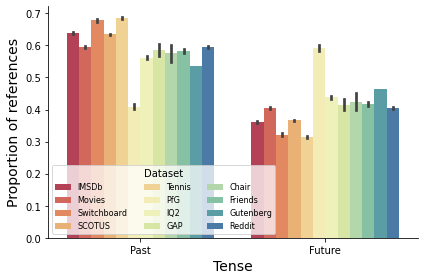

In [ ]:
sns.barplot(pd.concat(all_results), x='tense', y='proportion', hue='Dataset', palette='Spectral')
plt.xlabel('Tense', fontsize=14)
plt.ylabel('Proportion of references', fontsize=14)
plt.legend(loc='lower left', title='Dataset', frameon=True, ncol=3, fontsize=8, facecolor='white', framealpha=0.75)
sns.despine(top=True, right=True)
plt.tight_layout()

plt.savefig('meta-analysis.pdf', bbox_inches='tight')